In [16]:
import os
import torch
import numpy as np
import pickle
import mne
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler

In [2]:
path = '/gpfs2/well/woolrich/projects/cichy118_cont/preproc_data_onepass/lowpass25hz/subj1/cond0/trial0.npy'
trial = np.load(path)

In [3]:
trial.shape

(1001, 306)

In [16]:
cov = np.load(f"/well/woolrich/projects/cichy118_cont/preproc_data_onepass/cont/subj0_cov.npy")

In [20]:
np.mean(cov)

0.01414679037115268

In [2]:
# create a random matrix of size 3x2
x = torch.rand(3, 2)

In [3]:
x

tensor([[0.2085, 0.9024],
        [0.1241, 0.6394],
        [0.0806, 0.6670]])

In [4]:
x.reshape(-1)

tensor([0.2085, 0.9024, 0.1241, 0.6394, 0.0806, 0.6670])

In [134]:
weights = torch.tensor([0.1, 0.2, 0.6, 0.1], dtype=torch.float) # create a tensor of weights
torch.multinomial(weights, 2)

tensor([2, 0])

In [74]:
chn_ids.shape

torch.Size([2])

In [8]:
cond = torch.rand(2, 4, 3)
cond_ind = torch.randint(low=0, high=4, size=(2, 1, 3))
cond_ind = (cond_ind > 0).float()

In [15]:
cond_ind

tensor([[[1., 1., 1.]],

        [[1., 0., 1.]]])

In [13]:
cond

tensor([[[0.7144, 0.2697, 0.8196],
         [0.2590, 0.1846, 0.1688],
         [0.6476, 0.5651, 0.9869],
         [0.4280, 0.5500, 0.9660]],

        [[0.5265, 0.4155, 0.6843],
         [0.7053, 0.8829, 0.6416],
         [0.9878, 0.3706, 0.4291],
         [0.3935, 0.9955, 0.1402]]])

In [14]:
cond*cond_ind

tensor([[[0.7144, 0.2697, 0.8196],
         [0.2590, 0.1846, 0.1688],
         [0.6476, 0.5651, 0.9869],
         [0.4280, 0.5500, 0.9660]],

        [[0.5265, 0.0000, 0.6843],
         [0.7053, 0.0000, 0.6416],
         [0.9878, 0.0000, 0.4291],
         [0.3935, 0.0000, 0.1402]]])

In [ ]:
targets = np.random.rand(3, 4, 2)
chind = np.random.randint(low=0, high=4, size=(3))

In [ ]:
targets

In [ ]:
chind

In [ ]:
targets[[0,1,2], chind, :].shape

In [ ]:
bins = np.linspace(-1, 1, 255 + 1)
digitized = np.digitize([1, 0.1, 0.2, -0.5], bins) - 1

In [ ]:
signal = np.array([1, 0.1, 0.2, -0.5, -1])
digitized = ((signal + 1) / 2 * 255+0.5).astype(np.int32)
recon = 2 * ((digitized).astype(np.float32) / 255) - 1

In [ ]:
recon

In [ ]:
username = input("Enter username:")

## Checking quantized data

In [43]:
def mulaw_inv(x, maxabs, mu=255):
    x = (x - 0.5) / mu * 2 - 1
    x = np.sign(x)*((1+mu)**np.abs(x)-1)/mu

    x = x * maxabs.scale_[0]

    return x


In [38]:
maxabs_path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/cont_quantized/maxabs_scaler'
# load scaler from file
maxabs = pickle.load(open(maxabs_path, 'rb'))

In [42]:
maxabs.scale_

array([7.48763359, 7.89610585, 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 7.22732316, 8.        ,
       7.10520353, 8.        , 8.        , 8.        , 7.79664287,
       6.20631016, 8.        , 8.        , 5.23964831, 7.07893813,
       4.6772923 , 8.        , 6.88067672, 6.18185183, 4.90125681,
       8.        , 6.42580847, 4.89335454, 8.        , 8.        ,
       5.24898694, 5.89204872, 4.5115348 , 8.        , 8.        ,
       7.11554304, 4.86455008, 4.64709088, 5.63667458, 4.73875981,
       4.23151412, 4.68324405, 4.17188531, 4.57276092, 4.79026535,
       4.5023864 , 4.26234282, 5.30296529, 7.09197582, 8.        ,
       4.71323426, 8.        , 4.87622629, 5.5086678 , 8.        ,
       5.17119462, 5.18050988, 7.11202359, 4.56890146, 6.84616883,
       7.24121827, 7.32872657, 5.17242043, 4.44656512, 4.79643964,
       5.251347  , 3.73182652, 4.50723032, 5.17683058, 4.73014497,
       4.13790069, 6.08374483, 4.16544861, 4.43972754, 4.53546

In [32]:
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/subj1.npy'
dataset = np.load(path)
dataset = dataset[0, ::4]
dataset = RobustScaler().fit_transform(dataset.reshape(-1, 1)).reshape(-1)

In [34]:
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/cont_quantized/'
data = loadmat(path + 'ch0.mat')['x_val_t'][0]
target = loadmat(path + 'ch306.mat')['x_val_t'][0]
cond = loadmat(path + 'ch612.mat')['x_val_t'][0]
subid = loadmat(path + 'ch613.mat')['x_val_t'][0]

In [44]:
decoded = mulaw_inv(data, maxabs)

In [58]:
np.average((decoded - dataset[:len(decoded)])/dataset[:len(decoded)])

-0.03113561731716451

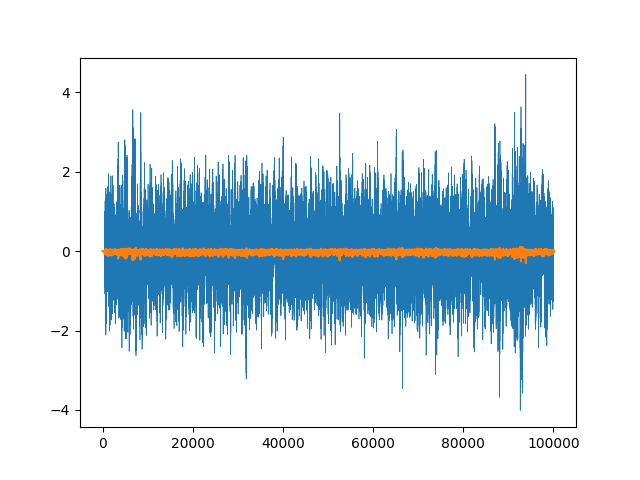

In [54]:
%matplotlib widget
plt.plot(dataset[:100000], linewidth=0.5)
plt.plot((decoded[:100000] - dataset[:100000]))


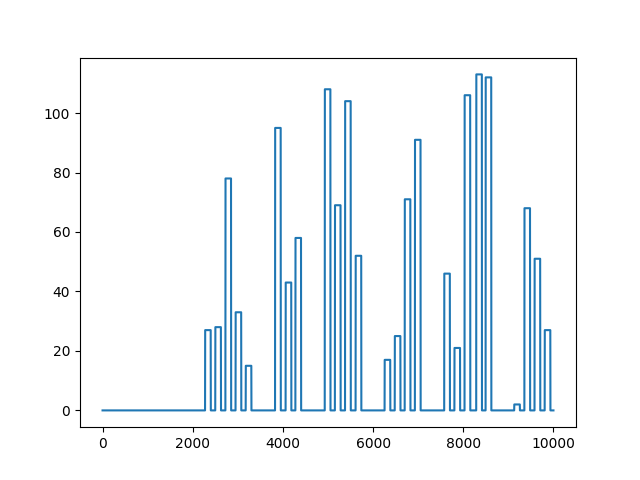

In [14]:
%matplotlib widget
plt.plot(cond[:10000])

In [66]:
%matplotlib widget
plt.hist(data, bins=100)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Checking outputs from generative decoder

In [49]:
outputs = torch.Tensor(np.load(os.path.join('cichy_data', 'subj1_quantized', 'outputs.npy')))
targets = torch.Tensor(np.load(os.path.join('cichy_data', 'subj1_quantized', 'targets.npy')))
targets = targets.long()

targets = targets.reshape(8, -1)
outputs = outputs.reshape(8, -1, outputs.shape[1])

In [21]:
loss = torch.nn.CrossEntropyLoss(reduction='none')

In [50]:
out_inds = torch.argmax(outputs,dim=-1)

In [26]:
out_inds[5]

tensor([ 37, 218,  92, 133,  92, 151,  92,  92,  92, 101,  92,  34,  79,  86,
         35, 244, 241, 242, 242,  92,  65,  25,  92,  34, 133, 229, 151,  86,
         94,  94,  65,  93,  95, 232, 133,  92, 172,  79,  92, 241, 229, 254,
         92,  86, 133, 218, 228,  34, 137,  92,  92, 181,  35,  92, 253,  65,
         92, 151,  92,  80, 247,  28, 108, 227, 214,  71,  35,  90, 163,  92,
         62, 218, 113, 185,  83, 242, 181,  30, 133,  92, 209, 209,  37,  92,
        166,  75, 242, 146,  92, 131,  92, 133,  86, 133,   0,  34,  92, 214,
        193, 151, 240, 230,  93, 209,  65,  92, 218, 218,  82,  65,  92, 209,
         92, 133,  92, 255,  92, 214, 138,  94, 230,  92,  79, 214,  86, 181,
        242, 149,  35,  92,  35,  92,   3,  37, 122, 214,  20,  79, 101,  87,
         81,  69,  92, 138, 199, 193,  92, 218, 198,  92,  92,  92,  92,  35,
         79,  92,  92,  35,  70,  92, 225,  92, 159, 193,  28, 201,  92,  82,
         92,  82, 163,  86,  86, 242,  82,   0, 241, 235, 169, 2

In [27]:
targets[5]

tensor([226., 233., 234., 218., 216., 208., 203., 218., 220., 216., 225., 228.,
        201., 188., 219., 223., 190., 201., 226., 214., 227., 228., 236., 236.,
        240., 237., 239., 238., 221., 225., 237., 224., 199., 181., 213., 216.,
        208., 233., 235., 233., 222., 234., 231., 230., 223., 215., 205., 234.,
        220., 223., 190., 194., 161., 219., 220., 214., 213., 222., 222., 224.,
        229., 193., 194., 217., 203., 207.,  92., 165.,  53., 216., 207., 211.,
        200., 211., 224.,  85., 103.,  36.,  42.,  37.,  59., 140., 174.,  74.,
         51.,  33.,  27., 139.,  46.,  41.,  67., 195.,  49.,  31.,  28.,  32.,
         24.,  27.,  24.,  22.,  33., 138.,  37.,  30.,  31.,  37.,  57.,  43.,
         62., 102., 209., 222., 204., 195., 187., 223., 186., 200., 147., 213.,
        213., 186., 223., 183., 231., 209., 221., 232., 224., 217., 221., 197.,
        204.,  78., 203.,  40.,  34.,  48., 118.,  37.,  43.,  37.,  37.,  43.,
        189.,  78.,  87.,  59.,  59., 12

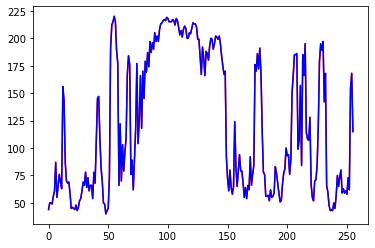

In [57]:
plt.plot(out_inds[2], 'r', targets[2], 'b')

In [42]:
for i in range(8):
    loss_val = torch.mean(loss(outputs[i], targets[i].long()))
    print(loss_val.item())

18.60439109802246
17.260879516601562
22.203916549682617
16.86305046081543
16.920394897460938
13.795106887817383
18.364038467407227
22.447723388671875


In [45]:
torch.mean(loss(outputs.reshape(-1, outputs.shape[2]), targets.reshape(-1)))

tensor(18.3074)

# Checking output

In [9]:
path = '../results/cichy_epoched/subj1/cont_quantized/losses.npy'
losses = np.load(path)

In [10]:
losses.shape

(1368, 306, 256)

In [13]:
ch_loss = np.mean(losses, axis=(0, 2))

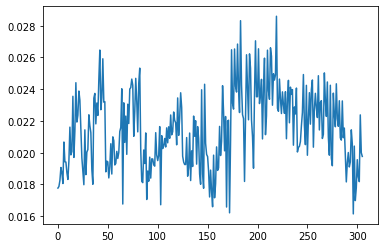

In [14]:
plt.plot(ch_loss)

In [20]:
# Load data
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif'
raw = mne.io.read_raw_fif(path, preload=True)
chn_type = 'meg'
raw = raw.pick(chn_type)

Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif...
    Range : 48000 ... 1703999 =     48.000 ...  1703.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw-1.fif...
    Range : 1704000 ... 3359999 =   1704.000 ...  3359.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw-2.fif...
    Range : 3360000 ... 5015999 =   3360.000 ...  5015.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw-3.fif...
    Range : 5016000 ... 5231999 =   5016.000 ...  5231.999 secs
Ready.
Reading 0 ... 5183999  =      0.000 ...  5183.999 secs...


In [21]:
evoked_ch1 = mne.EvokedArray(ch_loss.reshape(-1, 1), raw.info, tmin=0)

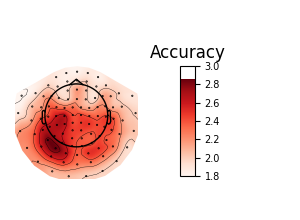

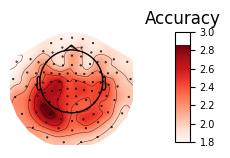

In [24]:
%matplotlib widget
evoked_ch1.plot_topomap(times=[0], ch_type='mag', time_unit='ms', scalings=100, units='Accuracy', time_format='', vmin=1.8)

In [38]:
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/subj1.npy'
dataset = np.load(path)
dataset = dataset[:, ::4]
dataset = RobustScaler().fit_transform(dataset.T)

In [39]:
dataset.shape

(1296000, 306)

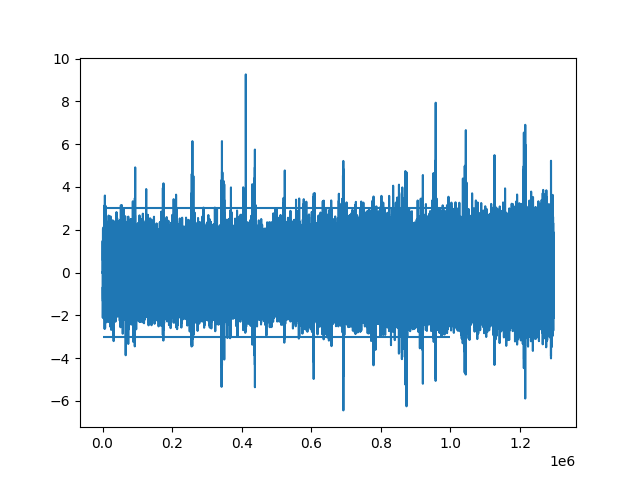

In [52]:
%matplotlib widget
for i in range(9,10):
    plt.plot(dataset[:, i])

plt.hlines([3, -3], 0, 1e6)

In [77]:
diffs = []
for i in range(1, 11):
    clipped = np.clip(dataset, -i, i)
    diffs.append(np.average(np.abs(clipped-dataset)))

<BarContainer object of 10 artists>

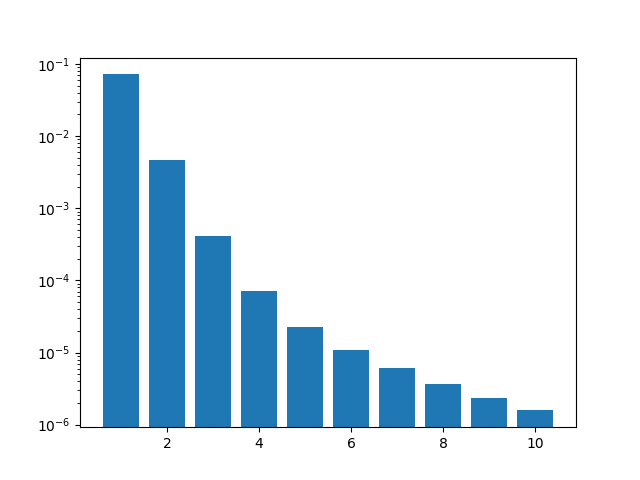

In [78]:
%matplotlib widget
plt.bar(np.arange(1, 11), height=diffs, log=True)